# CNN for eminst letter recognition
# Author: Christopher Holzweber

Sources#
Backpropagation Applied to Handwritten Zip Code Recognition https://doi.org/10.1162/neco.1989.1.4.541

Eminst Dataset: https://www.nist.gov/itl/products-and-services/emnist-dataset


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import np_utils

# Neuer Abschnitt

In [3]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image
def readTransformGet(dataset):
    df = pd.read_csv(dataset)
    X = df.iloc[:,1:]
    y = df.iloc[:,0]
    y = np.asarray(y) - 1
    X = np.asarray(X)
    X = X.astype('float32')
    X = np.apply_along_axis(rotate, 1, X)
    X /= 255
    plt.imshow(X[0], cmap=plt.get_cmap('gray'))
    #unique_items, num_classes = np.unique(y, return_counts=True)
    # reshape for CNN
    X = X.reshape(-1,28,28,1)
    #y = np_utils.to_categorical(y, num_classes)
    return X, y

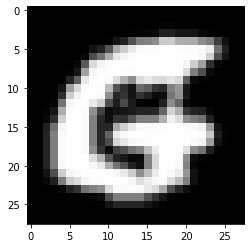

In [4]:
X_test, y_test = readTransformGet('emnist-letters-test.csv')
X_train, y_train = readTransformGet('emnist-letters-train.csv')

In [5]:
unique_items, num_classes = np.unique(y_train, return_counts=True)
num_classes = len(unique_items)
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [6]:
X_test.shape

(14799, 28, 28, 1)

In [7]:
X_train.shape

(88799, 28, 28, 1)

In [8]:
def create_keras_cnn():
  """
  Return a CNN in configuration of LeNet 1998
  """
  initializer = tf.keras.initializers.HeNormal()
  return tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(8, (5,5), activation='relu', strides = (1, 1), use_bias = True, padding = 'same',input_shape =(28,28,1)), # do padding in the first layer as introduced in LeNet
      tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
      tf.keras.layers.Conv2D(16, (5,5), activation='relu', use_bias = True, padding = 'valid',strides = 1),
      tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(84, activation='relu'),
      tf.keras.layers.Dense(26, activation='softmax') # we get 26 labeld classes
  ])

In [9]:
LeNet = create_keras_cnn()

In [10]:
LeNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 84)                3

In [11]:
initial_learning_rate = 0.01
sgd = tf.keras.optimizers.SGD(learning_rate=initial_learning_rate)
LeNet.compile(
    optimizer=sgd, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [12]:
epochs = 45
decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

history = LeNet.fit(
            X_train,
            y_train, 
            epochs=epochs,
            validation_data=(X_test,y_test),
            batch_size=64,
            callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_time_based_decay, verbose=1)]
            )


Epoch 00001: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/45
1388/1388 [==============================] - 18s 7ms/step - loss: 1.6853 - accuracy: 0.5033 - val_loss: 0.8700 - val_accuracy: 0.7336 - lr: 0.0100

Epoch 00002: LearningRateScheduler setting learning rate to 0.009997778048027466.
Epoch 2/45
1388/1388 [==============================] - 8s 6ms/step - loss: 0.6361 - accuracy: 0.8036 - val_loss: 0.5681 - val_accuracy: 0.8201 - lr: 0.0100

Epoch 00003: LearningRateScheduler setting learning rate to 0.009993336158082624.
Epoch 3/45
1388/1388 [==============================] - 8s 6ms/step - loss: 0.4700 - accuracy: 0.8526 - val_loss: 0.4934 - val_accuracy: 0.8475 - lr: 0.0100

Epoch 00004: LearningRateScheduler setting learning rate to 0.009986678377875959.
Epoch 4/45
1388/1388 [==============================] - 9s 6ms/step - loss: 0.3974 - accuracy: 0.8739 - val_loss: 0.4211 - val_accuracy: 0.8649 - lr: 0.0100

Epoch 00005: LearningRateScheduler set

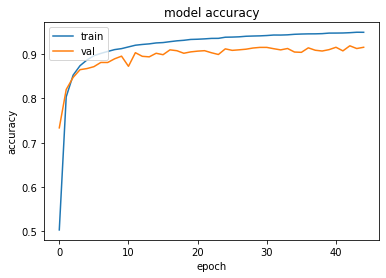

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

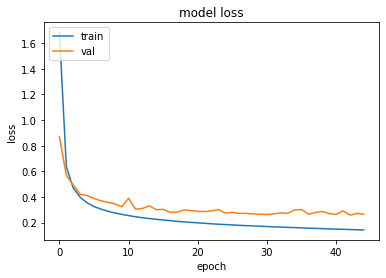

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
LeNet.save('./SavedModels/LeNet.h5')

In [18]:
import tensorflowjs as tfjs

In [ ]:
pip install tensorflowjs

In [19]:
tfjs.converters.save_keras_model(LeNet, 'LeNet')